In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import T2T_ACE.duplication_evaluation as duplication_evaluation
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.validator as v
import importlib
import T2T_ACE.dup_basepair_correction as dup_basepair_correction

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [142]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [143]:
importlib.reload(dup_basepair_correction)

<module 'T2T_ACE.dup_basepair_correction' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/dup_basepair_correction.py'>

In [144]:
importlib.reload(duplication_evaluation)

<module 'T2T_ACE.duplication_evaluation' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/duplication_evaluation.py'>

In [69]:
# BasePair Correction Dev
#TODO: Check the alignment in hg38 and hg2 and obtain the difference between the real DUP event vs DRAGEN call DONE
#TODO: Complete the extension function DONE
#TODO: Incorporate those functions to dup_eval class DONE
#TODO: Added the alignment results of the corrected interval

In [63]:
# Example 1: Shrink and Extend
duplication_evaluation.eval_dup_interval("chr6:256330-381943", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr6:256330-381943
hg38 dup count: 1
interval: chr6:256329-381943	strand: 1, start: 0, end: 125614
hg2 dup count: 3
interval: chr6_MATERNAL:209000-339723	strand: 1, start: 0, end: 125614
interval: chr16_MATERNAL:35170607-35297731	strand: -1, start: 177, end: 125614
interval: chr6_PATERNAL:209734-338805	strand: 1, start: 0, end: 125614
----------------------------------------------------------------
Analyzing the DUP interval chr6:256330-381943(125614bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be moved to the right by 177bp
----------------------------------------------------------------
ANALYZING THE END OF THE DUP INTERVAL
-------------------

{'dup_interval': 'chr6:256330-381943',
 'dup_interval_size': 125614,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 3,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 1,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr6:256507-382462',
 'corrected_interval_size': 125956,
 'expanded_length': 342,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [64]:
# Example 2: Extend on both ends
duplication_evaluation.eval_dup_interval("chr14:105616092-105632532", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:105616092-105632532
hg38 dup count: 1
interval: chr14:105616091-105632532	strand: 1, start: 0, end: 16441
hg2 dup count: 4
interval: chr14_MATERNAL:107615085-107631645	strand: 1, start: 0, end: 16441
interval: chr14_MATERNAL:107634637-107651251	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105325487-105342047	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105345039-105361644	strand: 1, start: 0, end: 16441
----------------------------------------------------------------
Analyzing the DUP interval chr14:105616092-105632532(16441bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_le

{'dup_interval': 'chr14:105616092-105632532',
 'dup_interval_size': 16441,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr14:105612977-105649912',
 'corrected_interval_size': 36936,
 'expanded_length': 20495,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [22]:
# Example 3: DUP that can't be precisely corrected
duplication_evaluation.eval_dup_interval("chr10:39364453-39376272", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39533724-39545544	strand: 1, start: 0, end: 11820
interval: chr10_MATERNAL:39523295-39535103	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39481579-39493387	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39492008-39503816	strand: 1, start: 0, end: 11815
interval: chr10_PATERNAL:39517717-39529534	strand: 1, start: 0, end: 11820
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_M

{'dup_interval': 'chr10:39364453-39376272',
 'dup_interval_size': 11820,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 6,
 'original_hg2_mat_hit_count': 5,
 'original_hg2_pat_hit_count': 1,
 'dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_interval': 'chr10:39363271-39376268',
 'corrected_interval_size': 12998,
 'expanded_length': 1178,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

In [65]:
# Example 4: DUP on the sex chromosome
duplication_evaluation.eval_dup_interval("chrX:49017567-49018675", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chrX:49017567-49018675
hg38 dup count: 1
interval: chrX:49017566-49018675	strand: 1, start: 0, end: 1109
hg2 dup count: 2
interval: chrX_MATERNAL:48440458-48441566	strand: 1, start: 0, end: 1109
interval: chrX_MATERNAL:48441566-48442674	strand: 1, start: 1, end: 1109
----------------------------------------------------------------
Analyzing the DUP interval chrX:49017567-49018675(1109bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
Basepair correction Method doesn't support DUPs on chrX or chrY
----------------------------------------------------------------
ANALYZING THE END OF T

{'dup_interval': 'chrX:49017567-49018675',
 'dup_interval_size': 1109,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 2,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 0,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chrX:49017567-49018676',
 'corrected_interval_size': 1110,
 'expanded_length': 1,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 2,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 0,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 0}

In [23]:
# Example 6: The corrected DUP END doesn't make sense
# Need further investigation
duplication_evaluation.eval_dup_interval("chr10:46514225-46561077", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:49784540-49831705	strand: -1, start: 0, end: 46853
interval: chr10_PATERNAL:48447360-48494479	strand: 1, start: 0, end: 46853
interval: chr10_PATERNAL:49717006-49764147	strand: -1, start: 0, end: 46853
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10

{'dup_interval': 'chr10:46514225-46561077',
 'dup_interval_size': 46853,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 5,
 'original_hg2_mat_hit_count': 3,
 'original_hg2_pat_hit_count': 2,
 'dup_interval_classification': 'Homozygous Duplication',
 'corrected_interval': 'chr10:46396229-46598510',
 'corrected_interval_size': 202282,
 'expanded_length': 155429,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 5,
 'corrected_hg2_mat_hit_count': 3,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

In [66]:
# Example 7: Basepair correction hits unresolved region (NNNNNNN) 
# For this case, the correction will end at the edge of the unresolved region
duplication_evaluation.eval_dup_interval("chr14:19725013-19956413", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:19725013-19956413
hg38 dup count: 1
interval: chr14:19725012-19956413	strand: 1, start: 0, end: 231401
hg2 dup count: 4
interval: chr14_MATERNAL:20204466-20435991	strand: 1, start: 0, end: 231401
interval: chr14_MATERNAL:21675534-21906954	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:19420937-19652399	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:18710102-18938130	strand: 1, start: 0, end: 231401
----------------------------------------------------------------
Analyzing the DUP interval chr14:19725013-19956413(231401bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to ch

{'dup_interval': 'chr14:19725013-19956413',
 'dup_interval_size': 231401,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr14:19611714-19956598',
 'corrected_interval_size': 344885,
 'expanded_length': 113484,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

In [67]:
# Perform DUP evaluation on all the HG002 DUP intervals from DRAGEN
HG2_DRAGEN_cnv_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1639/DRAGEN4_2_4_visualization/DRAGEN_Output/NA24385.cnv_sv.vcf"
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df
HG2_DRAGEN_cnv = read_vcf(HG2_DRAGEN_cnv_path)
HG2_DRAGEN_pass_cnv = HG2_DRAGEN_cnv[HG2_DRAGEN_cnv['FILTER']=='PASS']
HG2_DRAGEN_pass_cnv.head()

# Gather all the intervals for DEL and DUP from HG2 DRAGEN PASS
DEL_pass_intervals = []
DUP_pass_intervals = []
for index, row in HG2_DRAGEN_pass_cnv.iterrows():
    interval = row['CHROM'] + ':' + str(row['POS']) + '-' + str(row['INFO'].split('END=')[1].split(';')[0])
    if row['ALT'] == '<DEL>':
        DEL_pass_intervals.append(interval)
    elif row['ALT'] == '<DUP>':
        DUP_pass_intervals.append(interval)

# Remove the DUP interval that is a known FP
DUP_pass_intervals.remove("chr1:789481-224014488") # This is a known FP that was verified by illumina

print('HG2 DEL intervals:',len(DEL_pass_intervals))
print('HG2 DUP intervals:',len(DUP_pass_intervals))

HG2 DEL intervals: 996
HG2 DUP intervals: 114


In [78]:
hg2_dup_summary_df = pd.DataFrame()
hg2_dup_summary_df['interval'] = DUP_pass_intervals

# Collect the results for each interval from dup_eval
dup_interval_size_list = []
original_hg38_hit_count_list = []
original_hg2_hit_count_list = []
original_hg2_mat_hit_count_list = []
original_hg2_pat_hit_count_list = []
original_dup_interval_major_classification_list = []
original_dup_interval_sub_classification_list = []
original_dup_interval_contain_big_gap_list = []
corrected_interval_list = []
corrected_interval_size_list = []
expanded_length_list = []
corrected_hg38_hit_count_list = []
corrected_hg2_hit_count_list = []
corrected_hg2_mat_hit_count_list = []
corrected_hg2_pat_hit_count_list = []
corrected_dup_interval_major_classification_list = []
corrected_dup_interval_sub_classification_list = []
corrected_pos_accuracy_list = []
corrected_end_accuracy_list = []

for interval in DUP_pass_intervals:
    print(interval)
    interval_sum_dict = duplication_evaluation.eval_dup_interval(interval, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()
    dup_interval_size_list.append(interval_sum_dict['dup_interval_size'])
    original_hg38_hit_count_list.append(interval_sum_dict['original_hg38_hit_count'])
    original_hg2_hit_count_list.append(interval_sum_dict['original_hg2_hit_count'])
    original_hg2_mat_hit_count_list.append(interval_sum_dict['original_hg2_mat_hit_count'])
    original_hg2_pat_hit_count_list.append(interval_sum_dict['original_hg2_pat_hit_count'])
    original_dup_interval_major_classification_list.append(interval_sum_dict['original_dup_interval_major_classification'])
    original_dup_interval_sub_classification_list.append(interval_sum_dict['original_dup_interval_sub_classification'])
    original_dup_interval_contain_big_gap_list.append(interval_sum_dict['original_dup_interval_contain_big_gap'])
    corrected_interval_list.append(interval_sum_dict['corrected_interval'])
    corrected_interval_size_list.append(interval_sum_dict['corrected_interval_size'])
    expanded_length_list.append(interval_sum_dict['expanded_length'])
    corrected_hg38_hit_count_list.append(interval_sum_dict['corrected_hg38_hit_count'])
    corrected_hg2_hit_count_list.append(interval_sum_dict['corrected_hg2_hit_count'])
    corrected_hg2_mat_hit_count_list.append(interval_sum_dict['corrected_hg2_mat_hit_count'])
    corrected_hg2_pat_hit_count_list.append(interval_sum_dict['corrected_hg2_pat_hit_count'])
    corrected_dup_interval_major_classification_list.append(interval_sum_dict['corrected_dup_interval_major_classification'])
    corrected_dup_interval_sub_classification_list.append(interval_sum_dict['corrected_dup_interval_sub_classification'])
    corrected_pos_accuracy_list.append(interval_sum_dict['corrected_pos_accuracy'])
    corrected_end_accuracy_list.append(interval_sum_dict['corrected_end_accuracy'])
    
hg2_dup_summary_df['dup_interval_size'] = dup_interval_size_list
hg2_dup_summary_df['original_hg38_hit_count'] = original_hg38_hit_count_list
hg2_dup_summary_df['original_hg2_hit_count'] = original_hg2_hit_count_list
hg2_dup_summary_df['original_hg2_mat_hit_count'] = original_hg2_mat_hit_count_list
hg2_dup_summary_df['original_hg2_pat_hit_count'] = original_hg2_pat_hit_count_list
hg2_dup_summary_df['original_dup_interval_major_classification'] = original_dup_interval_major_classification_list
hg2_dup_summary_df['original_dup_interval_sub_classification'] = original_dup_interval_sub_classification_list
hg2_dup_summary_df['original_dup_interval_contain_big_gap'] = original_dup_interval_contain_big_gap_list
hg2_dup_summary_df['corrected_interval'] = corrected_interval_list
hg2_dup_summary_df['corrected_interval_size'] = corrected_interval_size_list
hg2_dup_summary_df['expanded_length'] = expanded_length_list
hg2_dup_summary_df['corrected_hg38_hit_count'] = corrected_hg38_hit_count_list
hg2_dup_summary_df['corrected_hg2_hit_count'] = corrected_hg2_hit_count_list
hg2_dup_summary_df['corrected_hg2_mat_hit_count'] = corrected_hg2_mat_hit_count_list
hg2_dup_summary_df['corrected_hg2_pat_hit_count'] = corrected_hg2_pat_hit_count_list
hg2_dup_summary_df['corrected_dup_interval_major_classification'] = corrected_dup_interval_major_classification_list
hg2_dup_summary_df['corrected_dup_interval_sub_classification'] = corrected_dup_interval_sub_classification_list
hg2_dup_summary_df['corrected_pos_accuracy'] = corrected_pos_accuracy_list
hg2_dup_summary_df['corrected_end_accuracy'] = corrected_end_accuracy_list

hg2_dup_summary_df.to_csv('HG002_DRAGEN_DUP_Summary.csv', index=False)

chr1:13225212-13247040
----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:13225212-13247040
hg38 dup count: 1
interval: chr1:13225211-13247040	strand: 1, start: 0, end: 21829
hg2 dup count: 3
interval: chr1_MATERNAL:12654730-12676537	strand: -1, start: 0, end: 21829
interval: chr1_MATERNAL:12868220-12890084	strand: 1, start: 0, end: 21829
interval: chr1_PATERNAL:12618932-12640735	strand: -1, start: 0, end: 21829
----------------------------------------------------------------
Analyzing the DUP interval chr1:13225212-13247040(21829bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
extending window size 2183
new interval chr1:132

In [79]:
hg2_dup_summary_df.head()

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,corrected_interval_size,expanded_length,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy
0,chr1:13225212-13247040,21829,1,3,2,1,Duplication,Maternal Heterozygous Duplication,False,chr1:13220889-13327497,106609.0,84780.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0
1,chr1:16605768-16645359,39592,1,5,2,3,Duplication,Homozygous Duplication,False,chr1:16552870-16660888,108019.0,68427.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,0.0,0.0
2,chr1:16715826-16727637,11812,1,5,2,3,Duplication,Homozygous Duplication,False,chr1:16680842-16733508,52667.0,40855.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,1.0,0.0
3,chr1:16879014-16949283,70270,1,4,2,2,Duplication,Homozygous Duplication,False,chr1:16859848-16954363,94516.0,24246.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0
4,chr1:143207550-143272360,64811,1,0,0,0,Reference Error,hg38 Reference Error,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
hg2_dup_summary_df['original_dup_interval_major_classification'].value_counts()

original_dup_interval_major_classification
Duplication        72
Copy Neutral       40
Reference Error     1
Unknown             1
Name: count, dtype: int64

In [100]:
set(hg2_dup_summary_df['original_dup_interval_sub_classification'].tolist())


{'Biallelic Copy Neutral',
 'Homozygous Duplication',
 'Maternal Copy Neutral',
 'Maternal Heterozygous Duplication',
 'Paternal Copy Neutral',
 'Paternal Heterozygous Duplication',
 'Unknown',
 'hg38 Reference Error'}

/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

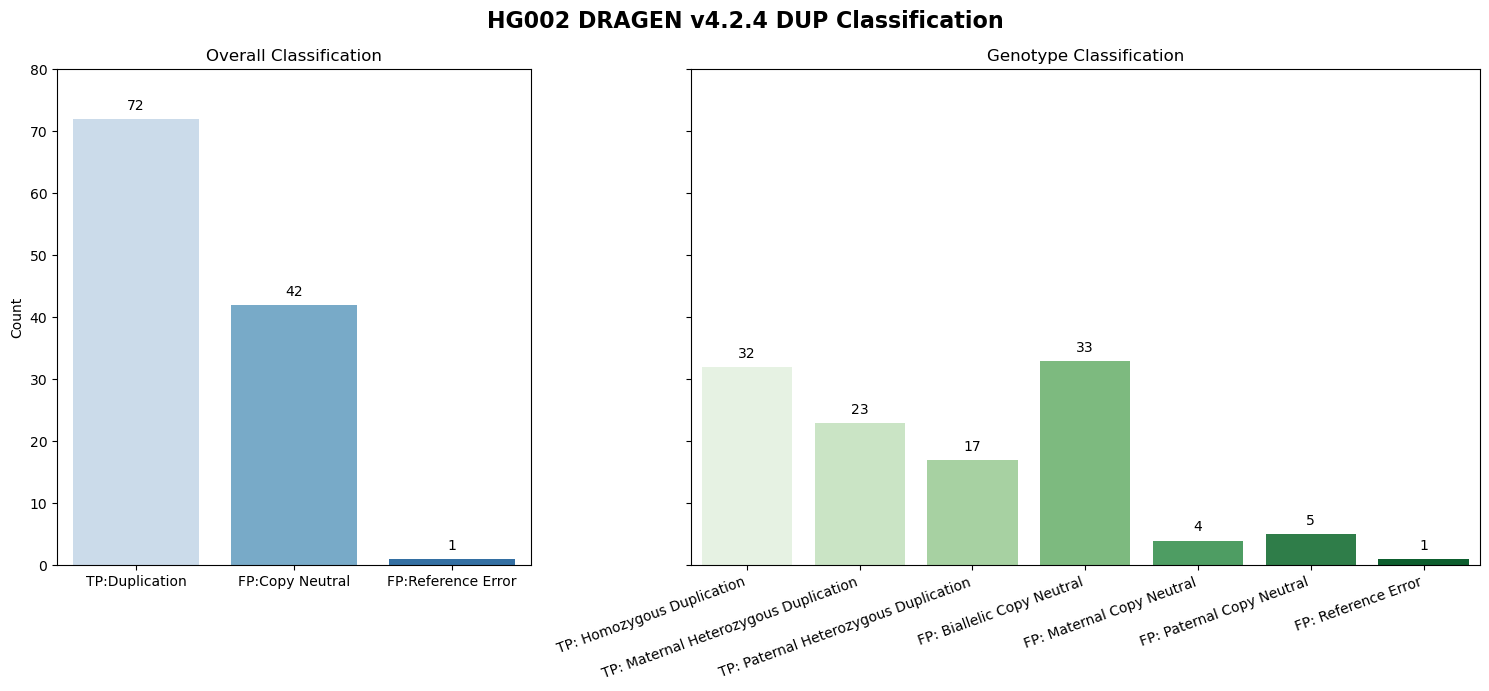

In [129]:
# Plot the performance of DRAGEN DUP classification

# Annotate the unknown classification
maj_classifications = ['TP:Duplication', 'FP:Copy Neutral', 'FP:Reference Error']
maj_count = [72,42,1]
sub_classifications = ['TP: Homozygous Duplication', 'TP: Maternal Heterozygous Duplication', 'TP: Paternal Heterozygous Duplication', 'FP: Biallelic Copy Neutral', 'FP: Maternal Copy Neutral', 'FP: Paternal Copy Neutral', 'FP: Reference Error']
sub_count = [32,23,17,33,4,5,1]

f, (ax0, ax1) = plt.subplots(nrows= 1, ncols= 2, figsize=(15,7), sharey=True, gridspec_kw={'width_ratios': [1.2, 2]})
maj_bar = sns.barplot(x=maj_classifications, y=maj_count, ax=ax0, palette='Blues')
ax0.set_xlabel('')
ax0.set_ylabel('Count')
ax0.set_ylim(0,80)
ax0.set_title('Overall Classification', fontsize=12)


sub_bar = sns.barplot(x=sub_classifications, y=sub_count, ax=ax1, palette='Greens')
ax1.set_xlabel('')
ax1.set_title('Genotype Classification', fontsize=12)

plt.xticks(rotation=20, ha='right')

# Annotations for major classifications
for i, count in enumerate(maj_count):
    maj_bar.text(i, count + 1, str(count), ha='center', va='bottom')

# Annotations for sub classifications
for i, count in enumerate(sub_count):
    sub_bar.text(i, count + 1, str(count), ha='center', va='bottom')

plt.suptitle('HG002 DRAGEN v4.2.4 DUP Classification', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig('HG002_DRAGEN_DUP_Classification.png', dpi=300)

In [131]:
# Load GATK-SV HG002 results
HG2_GATK_SV_vcf_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1818/GATK-SV_HG002.vcf"
HG2_GATK_SV_df = read_vcf(HG2_GATK_SV_vcf_path)
HG2_GATK_SV_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,10639,hgdp_and_hgsv_BND_chr1_1,N,<BND>,328,HIGH_SR_BACKGROUND;UNRESOLVED,ALGORITHMS=manta;AN=2;CHR2=chr15;END=10639;END...,GT:CONC_ST:ECN:EV:GQ:OGQ:PE_GQ:PE_GT:SL:SR_GQ:...,"0/0:EMPTY:2:PE,SR:99:99:99:0:-5815:0:0:pass"
1,chr1,11000,hgdp_and_hgsv_DUP_chr1_1,N,<DUP>,143,.,ALGORITHMS=depth;AN=2;END=51000;EVIDENCE=RD;MI...,GT:CONC_ST:ECN:EV:GQ:OGQ:RD_CN:RD_GQ:SL:GT_FILTER,0/0:EMPTY:2:RD:99:15:2:15:-975:pass
2,chr1,29000,hgdp_and_hgsv_DUP_chr1_2,N,<DUP>,999,.,"ALGORITHMS=depth;AN=2;END=140000;EVIDENCE=BAF,...",GT:CONC_ST:ECN:EV:GQ:OGQ:RD_CN:RD_GQ:SL:GT_FILTER,0/0:EMPTY:2:RD:99:4:1:4:-274:pass
3,chr1,40000,hgdp_and_hgsv_CNV_chr1_1,N,<CNV>,999,MULTIALLELIC,"ALGORITHMS=depth;END=107150;EVIDENCE=BAF,RD;MI...",GT:CN:CNQ:ECN:EV:OGQ:RD_CN:RD_GQ:SL:GT_FILTER:GQ,.:0:86:2:RD:-1:0:-1:334:pass:99
4,chr1,54669,hgdp_and_hgsv_INS_chr1_1,N,<INS>,349,HIGH_SR_BACKGROUND;HIGH_NCR,ALGORITHMS=manta;AN=0;END=54669;EVIDENCE=SR;MI...,GT:CONC_ST:ECN:EV:GQ:OGQ:PE_GQ:PE_GT:SL:SR_GQ:...,./.:EMPTY:2:SR:12:0:99:0:-64:0:1:hetFail


In [132]:
HG2_GATK_SV_df['FILTER'].value_counts()

FILTER
BOTHSIDES_SUPPORT                                                         92425
.                                                                         90002
UNRESOLVED                                                                34627
HIGH_SR_BACKGROUND                                                        29231
HIGH_SR_BACKGROUND;UNRESOLVED                                             28841
BOTHSIDES_SUPPORT;UNRESOLVED                                              15285
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND;UNRESOLVED                           14310
HIGH_SR_BACKGROUND;HIGH_NCR                                               13062
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND                                       8034
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND;HIGH_NCR                              4144
HIGH_NCR                                                                   3165
BOTHSIDES_SUPPORT;PESR_GT_OVERDISPERSION                                   2885
BOTHSIDES_SUPPORT;HIGH_NCR       

In [146]:
# Try to check a DUP interval that was identified by GATK-SV but not DRAGEN
duplication_evaluation.eval_dup_interval("chr1:154000-190000", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:154000-190000
hg38 dup count: 1
interval: chr1:153999-190000	strand: 1, start: 0, end: 36001
hg2 dup count: 7
interval: chr9_MATERNAL:143606120-143632970	strand: -1, start: 0, end: 26852
interval: chr7_MATERNAL:86420-113315	strand: 1, start: 0, end: 26852
interval: chr16_MATERNAL:90278169-90305009	strand: -1, start: 0, end: 26852
interval: chr9_PATERNAL:131322964-131349817	strand: -1, start: 0, end: 26852
interval: chr7_PATERNAL:86486-113347	strand: 1, start: 0, end: 26852
interval: chr16_PATERNAL:90704-117541	strand: 1, start: 0, end: 26852
interval: chr20_PATERNAL:54974-79769	strand: 1, start: 10872, end: 36001
The DUP interval's classification is Reference Error and it will not be corrected
----------------------------------------------------------------
End of Analysis of DUP interval chr1:15

{'dup_interval': 'chr1:154000-190000',
 'dup_interval_size': 36001,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 7,
 'original_hg2_mat_hit_count': 3,
 'original_hg2_pat_hit_count': 4,
 'original_dup_interval_major_classification': 'Reference Error',
 'original_dup_interval_sub_classification': 'hg38 Reference Error',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': nan,
 'corrected_interval_size': nan,
 'expanded_length': nan,
 'corrected_hg38_hit_count': nan,
 'corrected_hg2_hit_count': nan,
 'corrected_hg2_mat_hit_count': nan,
 'corrected_hg2_pat_hit_count': nan,
 'corrected_dup_interval_major_classification': nan,
 'corrected_dup_interval_sub_classification': nan,
 'corrected_pos_accuracy': nan,
 'corrected_end_accuracy': nan}